In [64]:
library(readr)
library(stringr)
library(dplyr)
library(igraph)
library(ggraph)

In [130]:
result_table <- read_csv(file = '../../Results/manuscript-studies-pfi-test-DWE-weights.csv.gz')

Parsed with column specification:
cols(
  Study = col_character(),
  EdgeID = col_double(),
  LCell = col_character(),
  Ligand = col_character(),
  Receptor = col_character(),
  RCell = col_character(),
  S1 = col_double(),
  med_diff = col_double(),
  AliquotBarcode = col_character(),
  PatientBarcode = col_character(),
  EdgeWt = col_double(),
  Stage = col_double(),
  PFI = col_double()
)



In [127]:
table(result_table$Study)


  COAD   ESCA   LUSC   PAAD   READ   SKCM   STAD 
 17703  23290 147136   1208    352  25398  55238 

In [73]:
result_table$SampleBarcode <- str_sub(result_table$AliquotBarcode, start = 1, end = 15)

In [74]:
head(result_table)

Study,EdgeID,LCell,Ligand,Receptor,RCell,S1,med_diff,AliquotBarcode,PatientBarcode,EdgeWt,Stage,PFI,SampleBarcode
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
SKCM,930270,Preadipocytes,SFRP1,FZD6,Osteoblast,0.2743006,0.15400849,TCGA-DA-A960-01A-11R-A37K-07,TCGA-DA-A960,0.008969967,1,2,TCGA-DA-A960-01
SKCM,925750,Preadipocytes,COL5A3,SDC3,Mast cells,0.2949511,0.17816280,TCGA-EB-A4OZ-01A-12R-A266-07,TCGA-EB-A4OZ,0.038965212,2,2,TCGA-EB-A4OZ-01
ESCA,586540,Megakaryocytes,IL1RN,IL1R2,Eosinophils,-0.1701334,-0.11258132,TCGA-L5-A4OT-01A-11R-A28J-31,TCGA-L5-A4OT,0.509381468,2,1,TCGA-L5-A4OT-01
ESCA,590462,Megakaryocytes,IL1RN,IL1R2,Megakaryocytes,-0.1730363,-0.11928949,TCGA-L5-A8NR-01A-11R-A37I-31,TCGA-L5-A8NR,0.126264476,2,2,TCGA-L5-A8NR-01
SKCM,925806,Preadipocytes,LRPAP1,SORT1,Mast cells,0.2733259,0.20182224,TCGA-FR-A3R1-01A-11R-A239-07,TCGA-FR-A3R1,0.280340579,1,2,TCGA-FR-A3R1-01
COAD,585007,Megakaryocytes,BMP10,ACVRL1,Chondrocytes,0.1714947,0.09921214,TCGA-DM-A285-01A-11R-A16W-07,TCGA-DM-A285,0.186627847,2,1,TCGA-DM-A285-01


In [5]:
clin <- read_csv(file = '../../Data/pancancer_clinical_extra_endpoints_mmc1.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  bcr_patient_barcode = col_character(),
  type = col_character(),
  PFI.1 = col_double(),
  PFI.time.1 = col_double(),
  PFI.2 = col_character(),
  PFI.time.2 = col_character(),
  PFS = col_double(),
  PFS.time = col_double(),
  DSS_cr = col_character(),
  DSS.time.cr = col_character(),
  DFI.cr = col_character(),
  DFI.time.cr = col_character(),
  PFI.cr = col_double(),
  PFI.time.cr = col_double(),
  PFI.1.cr = col_double(),
  PFI.time.1.cr = col_double(),
  PFI.2.cr = col_character(),
  PFI.time.2.cr = col_character()
)

Warning message:
“1844 parsing failures.
 row           col expected actual                                                     file
1563 PFI.time.1    a double   #N/A '../../Data/pancancer_clinical_extra_endpoints_mmc1.csv'
1563 PFS.time      a double   #N/A '../../Data/pancancer_clinical_extra_endpoints_mmc1.csv'
1563 PFI.time.cr   a double   #

In [21]:
pheno <- read_csv(file = '../../Data/Phenotypes_for_S1_Stats.csv')

Parsed with column specification:
cols(
  PatientBarcode = col_character(),
  Study = col_character(),
  Stage = col_logical(),
  PFI = col_double()
)

Warning message:
“2206 parsing failures.
 row   col           expected actual                                     file
6493 Stage 1/0/T/F/TRUE/FALSE      2 '../../Data/Phenotypes_for_S1_Stats.csv'
6494 Stage 1/0/T/F/TRUE/FALSE      2 '../../Data/Phenotypes_for_S1_Stats.csv'
6495 Stage 1/0/T/F/TRUE/FALSE      2 '../../Data/Phenotypes_for_S1_Stats.csv'
6496 Stage 1/0/T/F/TRUE/FALSE      2 '../../Data/Phenotypes_for_S1_Stats.csv'
6497 Stage 1/0/T/F/TRUE/FALSE      2 '../../Data/Phenotypes_for_S1_Stats.csv'
.... ..... .................. ...... ........................................
See problems(...) for more details.
”


In [23]:
pheno[1:5,]

PatientBarcode,Study,Stage,PFI
<chr>,<chr>,<lgl>,<dbl>
TCGA-04-1357,OV,NA,NA
TCGA-28-2510,GBM,NA,NA
TCGA-R8-A6YH,LGG,NA,NA
TCGA-CS-5390,LGG,NA,NA
TCGA-BH-A0B2,BRCA,NA,NA


In [7]:
load('../../Data/accessories_v2.rda')

In [51]:
xcell <- read_delim('../../Data/xCell_TCGA_RSEM.txt', delim = '\t', col_types = 'numeric')

Warning message:
“Missing column names filled in: 'X1' [1]”


ERROR: Error: Unknown shortcut: u


In [46]:
xcell[1:5,1:5]

X1,TCGA.V4.A9EE.01,TCGA.VD.AA8N.01,TCGA.V4.A9EI.01,TCGA.VD.AA8O.01
<chr>,<chr>,<chr>,<chr>,<chr>
aDC,5.877e-02,1.138e-01,4.302e-02,8.711e-02
Adipocytes,1.375e-19,3.926e-03,3.663e-21,-2.367e-21
Astrocytes,-1.621e-17,-2.176e-17,-1.587e-17,-2.469e-17
B-cells,4.805e-02,3.549e-02,2.253e-02,3.487e-02
Basophils,6.992e-02,2.074e-01,1.173e-01,1.978e-01


In [61]:
sampleids <- colnames(xcell)[-1]
cellids <- xcell$X1

In [65]:
sampleids <- sapply(sampleids, function(a) str_replace_all(a, '\\.', '-'))
sampleids[1:5]

TCGA.V4.A9EE.01   TCGA.VD.AA8N.01   TCGA.V4.A9EI.01   TCGA.VD.AA8O.01 
"TCGA-V4-A9EE-01" "TCGA-VD-AA8N-01" "TCGA-V4-A9EI-01" "TCGA-VD-AA8O-01" 
  TCGA.WC.A888.01 
"TCGA-WC-A888-01"

In [37]:
cellids[1:5]

[1] "aDC"        "Adipocytes" "Astrocytes" "B-cells"    "Basophils"

In [54]:
txcell <- t(xcell[,-1])
txcell[1:5,1:5]

TCGA.V4.A9EE.01,5.877e-02,1.375e-19,-1.621e-17,4.805e-02,6.992e-02
TCGA.VD.AA8N.01,1.138e-01,3.926e-03,-2.176e-17,3.549e-02,2.074e-01
TCGA.V4.A9EI.01,4.302e-02,3.663e-21,-1.587e-17,2.253e-02,1.173e-01
TCGA.VD.AA8O.01,8.711e-02,-2.367e-21,-2.469e-17,3.487e-02,1.978e-01
TCGA.WC.A888.01,2.079e-01,-5.244e-20,-2.434e-17,2.304e-01,1.843e-01


In [55]:
txcell <- t(xcell[,-1])
txcell <- apply(txcell, 2, as.numeric)
txcell[1:5,1:5]

0.05877,1.375e-19,-1.621e-17,0.04805,0.06992
0.11380,3.926e-03,-2.176e-17,0.03549,0.20740
0.04302,3.663e-21,-1.587e-17,0.02253,0.11730
0.08711,-2.367e-21,-2.469e-17,0.03487,0.19780
0.20790,-5.244e-20,-2.434e-17,0.23040,0.18430


In [57]:
dim(txcell)

[1] 9947   64

In [67]:
rownames(txcell) <- sampleids
colnames(txcell) <- cellids
txcell[1:5,1:5]

,aDC,Adipocytes,Astrocytes,B-cells,Basophils
TCGA-V4-A9EE-01,0.05877,1.375e-19,-1.621e-17,0.04805,0.06992
TCGA-VD-AA8N-01,0.11380,3.926e-03,-2.176e-17,0.03549,0.20740
TCGA-V4-A9EI-01,0.04302,3.663e-21,-1.587e-17,0.02253,0.11730
TCGA-VD-AA8O-01,0.08711,-2.367e-21,-2.469e-17,0.03487,0.19780
TCGA-WC-A888-01,0.20790,-5.244e-20,-2.434e-17,0.23040,0.18430


In [75]:
dfxcell <- cbind( data.frame(SampleBarcode=rownames(txcell)), as.data.frame(txcell) )
dfxcell[1:5,1:5]


,SampleBarcode,aDC,Adipocytes,Astrocytes,B-cells
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.V4.A9EE.01,TCGA-V4-A9EE-01,0.05877,1.375e-19,-1.621e-17,0.04805
TCGA.VD.AA8N.01,TCGA-VD-AA8N-01,0.11380,3.926e-03,-2.176e-17,0.03549
TCGA.V4.A9EI.01,TCGA-V4-A9EI-01,0.04302,3.663e-21,-1.587e-17,0.02253
TCGA.VD.AA8O.01,TCGA-VD-AA8O-01,0.08711,-2.367e-21,-2.469e-17,0.03487
TCGA.WC.A888.01,TCGA-WC-A888-01,0.20790,-5.244e-20,-2.434e-17,0.23040


In [83]:
df <- inner_join(dfxcell, result_table) %>% filter(Study == 'STAD' | Study == 'ESCA')

Joining, by = "SampleBarcode"



In [84]:
head(df)

,SampleBarcode,aDC,Adipocytes,Astrocytes,B-cells,Basophils,CD4+ memory T-cells,CD4+ naive T-cells,CD4+ T-cells,CD4+ Tcm,⋯,Ligand,Receptor,RCell,S1,med_diff,AliquotBarcode,PatientBarcode,EdgeWt,Stage,PFI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,TCGA-CD-5804-01,0.09617,0.05806,0.1168,0.008939,-8.684e-19,0.05781,0.0391,3.387e-19,-4.002e-19,⋯,LAMA5,ITGA2,Preadipocytes,-0.1341085,-0.05458281,TCGA-CD-5804-01A-12R-2055-13,TCGA-CD-5804,0.01406555,NA,2
2,TCGA-CD-5804-01,0.09617,0.05806,0.1168,0.008939,-8.684e-19,0.05781,0.0391,3.387e-19,-4.002e-19,⋯,PROC,PROCR,HSC,0.1367843,0.05863951,TCGA-CD-5804-01A-12R-2055-13,TCGA-CD-5804,0.53145444,NA,2
3,TCGA-CD-5804-01,0.09617,0.05806,0.1168,0.008939,-8.684e-19,0.05781,0.0391,3.387e-19,-4.002e-19,⋯,FARP2,PLX3,naive B-cells,-0.1407918,-0.05892446,TCGA-CD-5804-01A-12R-2055-13,TCGA-CD-5804,0.04718152,NA,2
4,TCGA-CD-5804-01,0.09617,0.05806,0.1168,0.008939,-8.684e-19,0.05781,0.0391,3.387e-19,-4.002e-19,⋯,GDNF,RET,Hepatocytes,0.1337881,0.04752800,TCGA-CD-5804-01A-12R-2055-13,TCGA-CD-5804,0.00236069,NA,2
5,TCGA-CD-5804-01,0.09617,0.05806,0.1168,0.008939,-8.684e-19,0.05781,0.0391,3.387e-19,-4.002e-19,⋯,ANGPT1,ITGB1,HSC,0.1386338,0.05010896,TCGA-CD-5804-01A-12R-2055-13,TCGA-CD-5804,0.14630163,NA,2
6,TCGA-CD-5804-01,0.09617,0.05806,0.1168,0.008939,-8.684e-19,0.05781,0.0391,3.387e-19,-4.002e-19,⋯,ADM2,CALCRL,CLP,0.1339065,0.04967261,TCGA-CD-5804-01A-12R-2055-13,TCGA-CD-5804,0.34878273,NA,2


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 426 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 426 rows containing non-finite values (stat_smooth).”


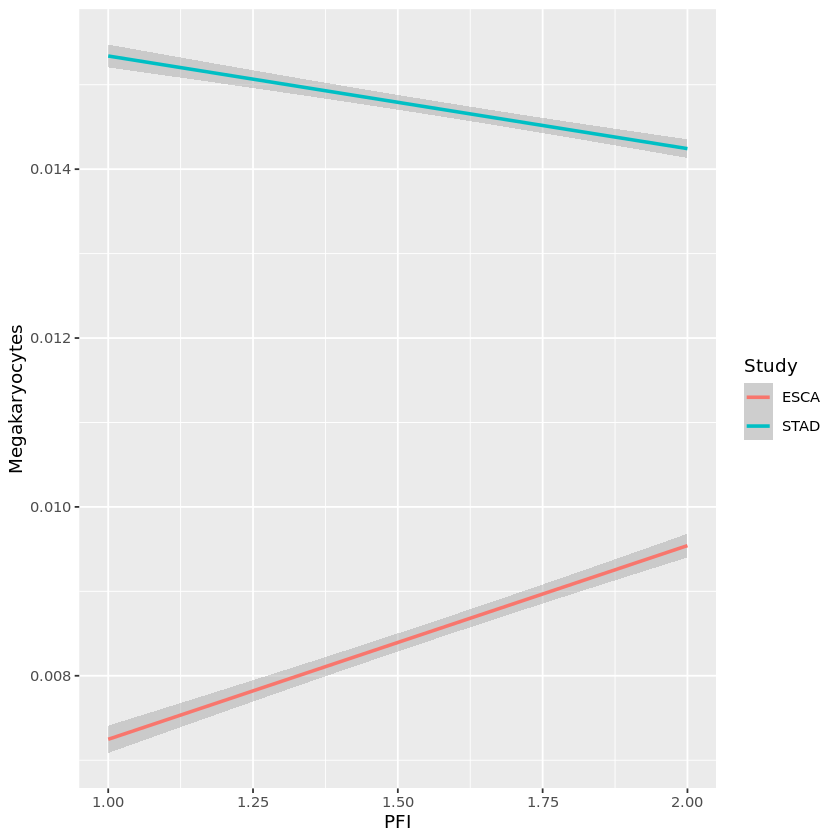

In [93]:
g1 <- ggplot(data=df, aes(x=PFI, y=Megakaryocytes, color=Study)) + geom_smooth(method = 'lm')
ggsave(g1, filename = 'esca_vs_stad_megakaryocytes.png')
g1

In [139]:
result_table2 <- result_table %>% filter(Study == 'LUSC') 

result_table2$Ligand_Producing_Cells <- factor(result_table2$LCell, # Factor levels in increasing order
    levels = names(sort(table(result_table2$LCell))))

g2 <- ggplot(data=result_table2 , aes(y=Ligand_Producing_Cells)) + geom_bar() + ggtitle('LUSC counts of ligand producing cells in DWEs')
ggsave(g2, filename = 'LUSC_ligand_cells_dwes.png')

Saving 6.67 x 6.67 in image



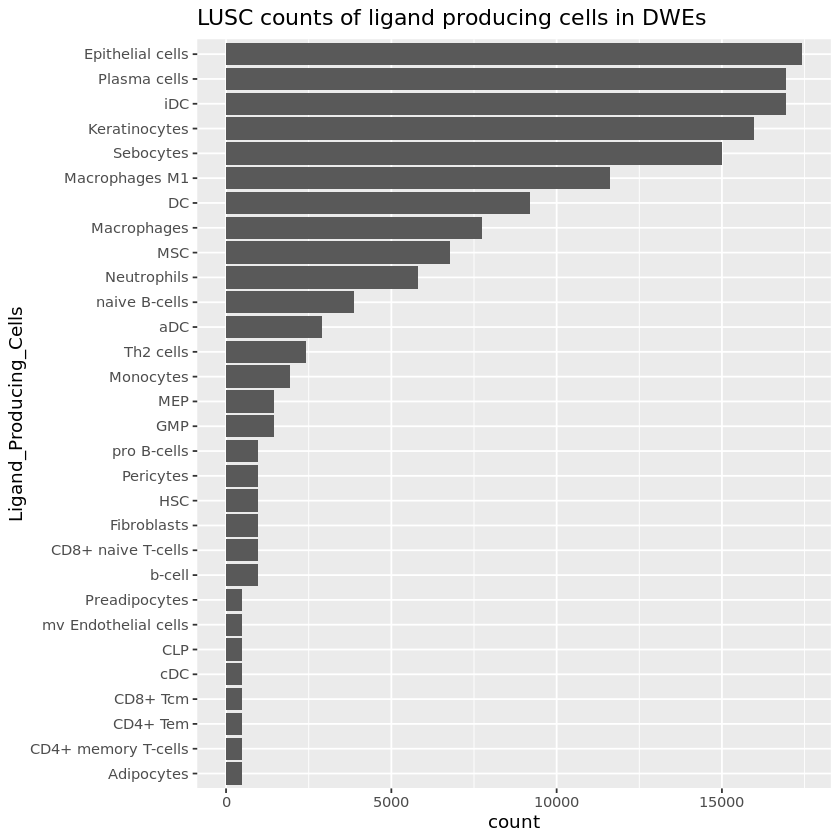

In [140]:
g2

Saving 6.67 x 6.67 in image



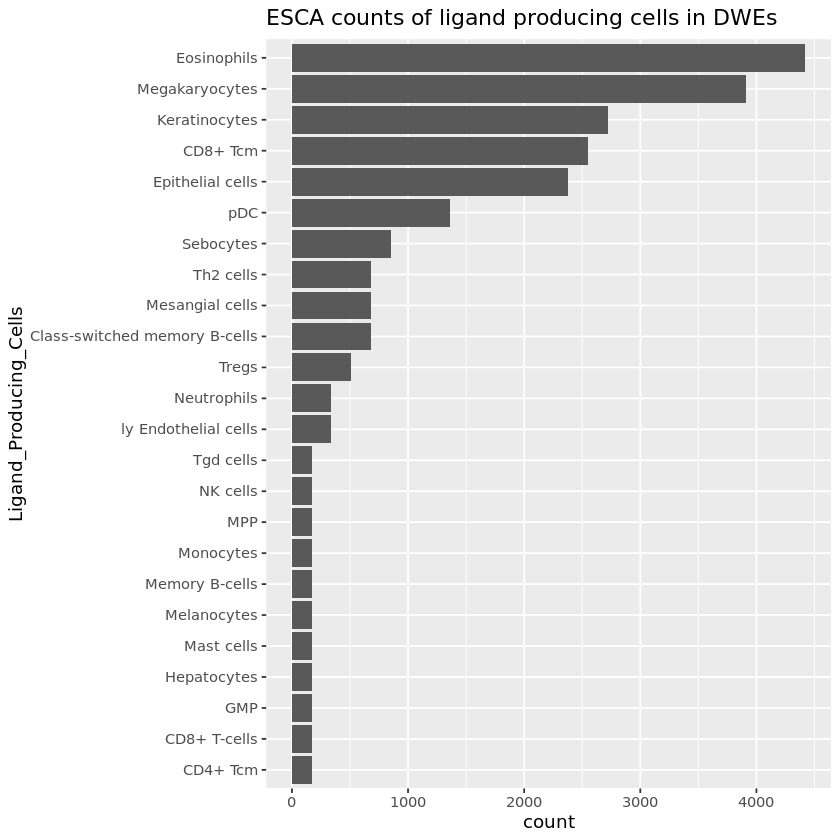

In [142]:
result_table2 <- result_table %>% filter(Study == 'ESCA') 

result_table2$Ligand_Producing_Cells <- factor(result_table2$LCell, # Factor levels in increasing order
    levels = names(sort(table(result_table2$LCell))))

g2 <- ggplot(data=result_table2 , aes(y=Ligand_Producing_Cells)) + geom_bar() + ggtitle('ESCA counts of ligand producing cells in DWEs')
ggsave(g2, filename = 'ESCA_ligand_cells_dwes.png')
g2

In [154]:
table(result_table$Study)


  COAD   ESCA   LUSC   PAAD   READ   SKCM   STAD 
 17703  23290 147136   1208    352  25398  55238 

In [160]:
result_table %>% filter( RCell == 'GMP') %>% group_by (Study) %>% summarise(meangmp = mean(S1))

`summarise()` ungrouping output (override with `.groups` argument)



Study,meangmp
<chr>,<dbl>
LUSC,0.1211943


In [161]:
result_table %>% filter( LCell == 'GMP') %>% group_by (Study) %>% summarise(meangmp = mean(S1))

`summarise()` ungrouping output (override with `.groups` argument)



Study,meangmp
<chr>,<dbl>
ESCA,0.1839858
LUSC,0.1333435


In [172]:
result_table %>%  group_by( Study ) %>% select(LCell) %>% table() #

Adding missing grouping variables: `Study`



      LCell
Study    aDC Adipocytes astrocytes b-cell Basophils CD4+ memory T-cells
  COAD     0          0       3372      0         0                   0
  ESCA     0          0          0      0         0                   0
  LUSC  2904        484          0    968         0                 484
  PAAD     0          0          0      0         0                   0
  READ     0          0          0      0         0                   0
  SKCM   306          0          0      0      2448                   0
  STAD     0          0          0   1556         0                2723
      LCell
Study  CD4+ naive T-cells CD4+ T-cells CD4+ Tcm CD4+ Tem CD8+ naive T-cells
  COAD                  0            0        0        0                  0
  ESCA                  0            0      170        0                  0
  LUSC                  0            0        0      484                968
  PAAD                  0            0        0     1057                  0
  READ              

In [175]:
log10(17424)

[1] 4.241148